In [4]:
%matplotlib inline

# Notebook zum Rumspielen #

## Verteilung der z-scores plotten

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

import helper

Deutsches Beispielkorpus einlesen:

In [10]:
terms, documents, matrix = helper.read_csv("data/delta_corpus_DE.csv")
authors = helper.extract_authors_from_document_names(documents)

It's much better to import the data as a Pandas array, though:

In [24]:
import pandas as pd
data = pd.read_csv("data/delta_corpus_DE.csv", sep=",", index_col=0)

In [28]:
data.head()

,"Spielhagen,-Friedrich_Zum Zeitvertreib.txt","Goethe,-Johann-Wolfgang_Die Leiden des jungen Werther.txt","Marlitt,-Eugenie_Goldelse.txt","Raabe,-Wilhelm_Stopfkuchen. Eine See- und Mordgeschichte.txt","Huber,-Therese_Luise.txt","Hauff,-Wilhelm_Lichtenstein.txt","May,-Karl_Kurdistan.txt","Fontane,-Theodor_Effi Briest.txt","Fouqué,-Caroline-de-la-Motte_Die Frau des Falkensteins.txt","Hahn-Hahn,-Ida-Gräfin-von_Gräfin Faustine.txt",...,"Arnim,-Ludwig-Achim-von_Kronenwächter 1.txt","Spielhagen,-Friedrich_Problematische Naturen. Erste Abtheilung.txt","Fouqué,-Caroline-de-la-Motte_Magie der Natur.txt",Jean-Paul_Flegeljahre.txt,"Huber,-Therese_Die Familie Seldorf.txt","Ebner-Eschenbach,-Marie-von_Bozena.txt","Tieck,-Ludwig_Geschichte des Herrn William Lovell.txt","May,-Karl_Old Surehand I.txt","Wieland,-Christoph-Martin_Die Abenteuer des Don Sylvio von Rosalva.txt","Schopenhauer,-Johanna_Gabriele.txt"
und,1131,1372,2973,2460,950,3752,4045,3440,2110,2337,...,2749,5081,1403,5907,2876,1986,5444,4093,3038,3919
die,1370,858,2569,1137,793,2877,2650,1801,1425,1595,...,2494,4583,1027,3759,2149,1508,3323,2631,3194,2790
der,1262,743,1995,1468,567,2964,2757,1423,1135,1322,...,2619,4181,878,3934,1940,1252,2429,2253,2322,3090
zu,855,579,1261,763,1091,1681,2113,982,916,1054,...,1309,2675,599,1851,1551,940,2128,2526,2377,3292
in,872,479,1438,859,487,1633,1451,1040,1022,944,...,1362,3005,689,2032,1339,794,2357,1269,1774,2540


In [38]:
data2 = data.ix[0:10,0:5]
data2

,"Spielhagen,-Friedrich_Zum Zeitvertreib.txt","Goethe,-Johann-Wolfgang_Die Leiden des jungen Werther.txt","Marlitt,-Eugenie_Goldelse.txt","Raabe,-Wilhelm_Stopfkuchen. Eine See- und Mordgeschichte.txt","Huber,-Therese_Luise.txt"
und,1131,1372,2973,2460,950
die,1370,858,2569,1137,793
der,1262,743,1995,1468,567
zu,855,579,1261,763,1091
in,872,479,1438,859,487
er,688,380,932,469,451
den,670,373,1286,757,352
sie,672,591,1634,355,1329
ich,444,936,786,1015,61
nicht,780,459,946,719,369


In [55]:
data2.sub(data2.mean(axis="columns"), axis="rows")

,"Spielhagen,-Friedrich_Zum Zeitvertreib.txt","Goethe,-Johann-Wolfgang_Die Leiden des jungen Werther.txt","Marlitt,-Eugenie_Goldelse.txt","Raabe,-Wilhelm_Stopfkuchen. Eine See- und Mordgeschichte.txt","Huber,-Therese_Luise.txt"
und,-646.2,-405.2,1195.8,682.8,-827.2
die,24.6,-487.4,1223.6,-208.4,-552.4
der,55.0,-464.0,788.0,261.0,-640.0
zu,-54.8,-330.8,351.2,-146.8,181.2
in,45.0,-348.0,611.0,32.0,-340.0
er,104.0,-204.0,348.0,-115.0,-133.0
den,-17.6,-314.6,598.4,69.4,-335.6
sie,-244.2,-325.2,717.8,-561.2,412.8
ich,-204.4,287.6,137.6,366.6,-587.4
nicht,125.4,-195.6,291.4,64.4,-285.6


In [56]:
42

42

Wir entfernen alle Terme, die in weniger als zwei Dokumenten vorkommen und wandeln die absoluten Häufigkeiten in relative um:

In [11]:
matrix, terms = helper.transform_to_relative_frequency(matrix, terms, min_df=2)

Wir wollen nur die 1000 häufigsten Terme und wir wollen die Merkmale standardisieren (z-scores):

In [12]:
matrix, terms = helper.select_most_frequent(matrix, terms, 1000)
z_scores = scipy.stats.zscore(matrix, axis=0, ddof=1)

Wir plotten ein Histogramm der Merkmale eines Dokuments und legen die entsprechende Normalverteilung darüber:

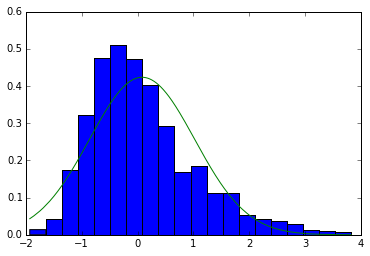

In [13]:
sorted_z_scores = np.sort(z_scores[0])
fit = scipy.stats.norm.pdf(sorted_z_scores, np.mean(sorted_z_scores), np.std(sorted_z_scores))
plt.hist(sorted_z_scores, bins=20, normed=True)
plt.plot(sorted_z_scores, fit)
plt.show()

Das sieht nicht sehr normalverteilt aus; ein Shapiro-Wilk-Test bestätigt diesen Eindruck:

In [14]:
print("Shapiro-Wilk: p = %.3e" % scipy.stats.shapiro(sorted_z_scores)[1])

Shapiro-Wilk: p = 3.370e-19


Testen wir noch ein paar weitere Dokumente:

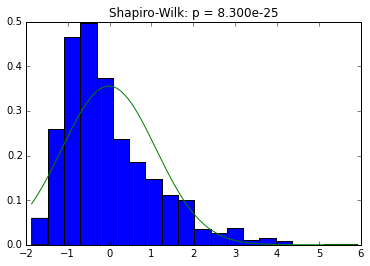

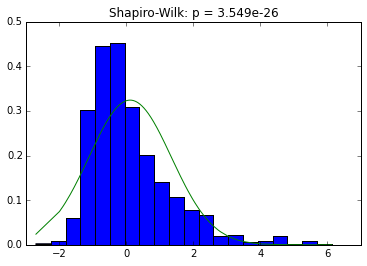

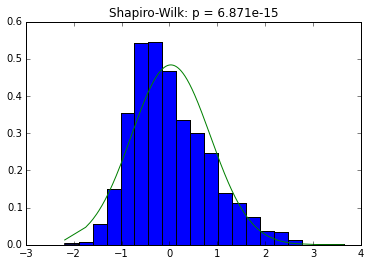

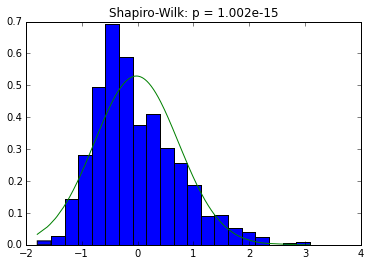

In [41]:
for i in [3,6,9,12]:
    sorted_z_scores = np.sort(z_scores[i])
    fit = scipy.stats.norm.pdf(sorted_z_scores, np.mean(sorted_z_scores), np.std(sorted_z_scores))
    plt.hist(sorted_z_scores, bins=20, normed=True)
    plt.plot(sorted_z_scores, fit)
    plt.title("Shapiro-Wilk: p = %.3e" % scipy.stats.shapiro(sorted_z_scores)[1])
    plt.show()